# **Histogram Matching**

In [ ]:
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings("ignore")

Reference = np.array(Image.open('Reference.jpg'))
Source = np.array(Image.open('Source.jpg'))

In [ ]:
def Matching_Histogram(Reference, Source):
  num_bins = 255
  matched_image = Source
  for rgb in range(Source.shape[2]):
    # Calculate CDF of the images:
    ref_CDF, bins = CDF(Reference, rgb, num_bins)
    src_CDF, bins = CDF(Source, rgb, num_bins)
    # Normalizing the CDFs:
    ref_CDF = Normalize(ref_CDF)
    src_CDF = Normalize(src_CDF)
    # Matching the images:
    new_src = np.interp(Source[:,:,rgb].flatten(), bins[:-1], src_CDF)
    changed_src = np.interp(new_src, ref_CDF, bins[:-1])
    matched_image[:,:,rgb] = changed_src.reshape((Source.shape[0],Source.shape[1]))
  return matched_image

def CDF(input, rgb, num_bins):
  Hist, bins = np.histogram(input[:,:,rgb].flatten(), num_bins, normed = True)
  cdf = np.cumsum(Hist)
  return cdf, bins

def Normalize(input_CDF):
  return (255*input_CDF/input_CDF[-1]).astype(np.uint8)

In [ ]:
Matched_Image = Matching_Histogram(Reference, Source)
Matched_Image = Image.fromarray(Matched_Image)

<ipython-input-32-4693a9f9c1b1>:18: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  Hist, bins = np.histogram(input[:,:,rgb].flatten(), num_bins, normed = True)


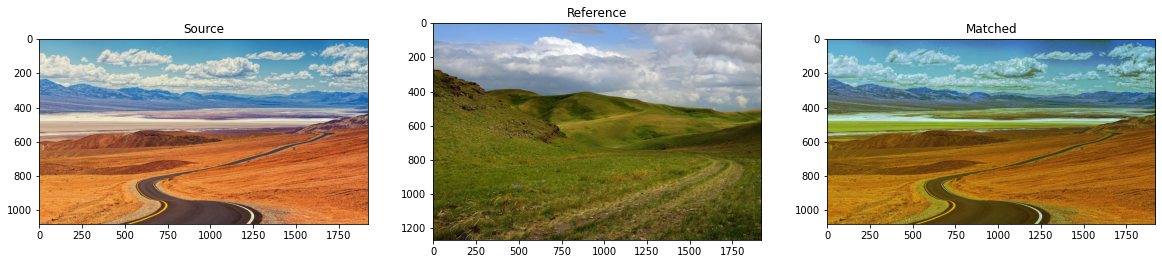

In [ ]:
fig, axs = plt.subplots(1,3,figsize = (20,15))
axs[0].imshow(mpimg.imread('Source.jpg'))
axs[0].title.set_text('Source')
axs[1].imshow(mpimg.imread('Reference.jpg'))
axs[1].title.set_text('Reference')
axs[2].imshow(mpimg.imread('Matched_Image.jpg'))
axs[2].title.set_text('Matched')